In [2]:
import cv2 
import numpy
from convolucao import mean_filter
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread(r'trab-n1\images\lena.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img.shape

(512, 512)

In [3]:
cv2.imshow('abacate', img)
cv2.waitKey()

-1

In [4]:
new_img = mean_filter(img, 3)
cv2.imshow('abacate', new_img)
cv2.waitKey()

-1

In [5]:

new_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

new_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [1]:
def MeanImage(image, kernel_size):
  x_pixels, y_pixels = image.shape
  new_im = image.copy()
  neighbor_range = kernel_size // 2 #how many neighbors to one side we need to look at

  for x in range(x_pixels):
    for y in range(y_pixels):
      total = 0
      for x_i in range(max(0, x-neighbor_range), min(x_pixels-1, x+neighbor_range)+1):
        for y_i in range(max(0, y-neighbor_range), min(y_pixels-1, y+neighbor_range)+1):
          total += image[x_i, y_i]

      new_im[x,y] = total/(kernel_size**2)

  return new_im

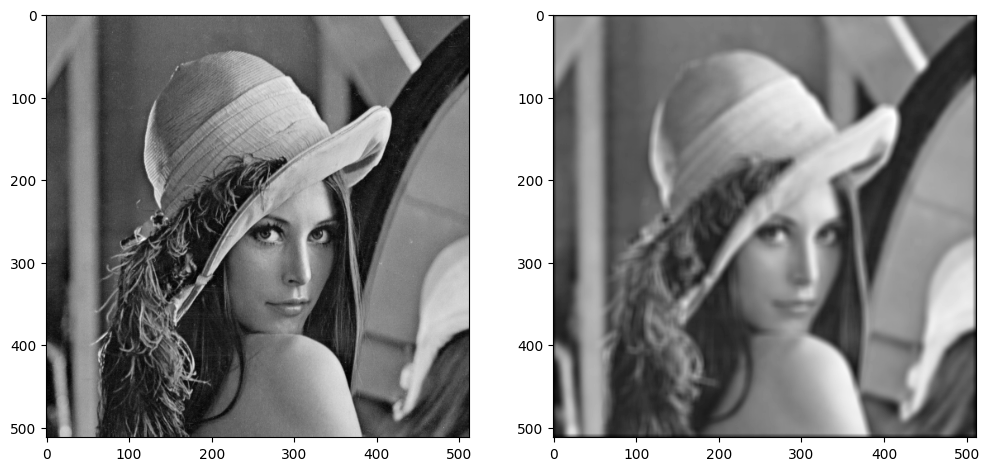

In [17]:
meanIm = MeanImage(img, 9)

fig, ax = plt.subplots(1,2, figsize= (12,10))
ax[0].imshow(img, cmap= 'gray')
ax[1].imshow(meanIm, cmap= 'gray')
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

# ========= Loading the image =========

img = cv2.imread(r'.\images\abacate.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ======== Creating the Kernel ======== 

k = int(input('Dimensão do kernel desejado: '))

kernel_median = np.ones((k,k))

c = int (k/2) # Just do simplify; k is the kernel dimension (k x k)

# ======== Number of Iterations ======== 

n = int(input('Número de aplicações do filtro: '))

# =========== Image Content ============ 

image_content = input('Conteúdo da imagem: ')

# ============== Padding ===============

padding = int(input('Padding? '))

print('Dimensões do Kernel:', kernel_median.shape)

print('Dimensões da Imagem:', img.shape)

print(kernel_median)


cv2.imshow('não filtrado', img)
cv2.waitKey()

if padding == 1:

  line, column = (img.shape) 

  holdpdd = np.zeros( ((line + 2 * c), (column + 2 * c)) )  

  new_line, new_column = (holdpdd.shape)

  holdpdd [ c : new_line - c , c : new_column - c ] = img # Based on the Professor Navar's lecture.

  mean_image = holdpdd.copy()
    
  print(holdpdd.shape)

  # Convolution

  for i in range(n): 
    for x in range(c,mean_image.shape[0]-c):
      for y in range(c,mean_image.shape[1]-c):
        
        lol = mean_image[ x - c : x + c + 1 , y - c : y + c + 1 ]
        
        mean = (lol * kernel_median).sum()
          
        mean_image [x,y] = round(mean)

  # To remove the padding

  final_image = np.zeros((img.shape[0] , img.shape[1]))

  final_image = mean_image[ c : new_line - c , c : new_column - c ] 


# If padding is not wanted

else:

    mean_image = img.copy()

    for i in range(n): 
      for x in range(c,mean_image.shape[0]-c):
        for y in range(c,mean_image.shape[1]-c):
          
          lol = mean_image[ x - c : x + c + 1 , y - c : y + c + 1 ]
          
          mean = (lol*kernel).sum()
              
          mean_image [x,y] = round(mean)
    
    final_image = np.zeros((img.shape[0] , img.shape[1]))
    final_image = mean_image

plt.imshow(mean_image,cmap='gray')
plt.show()

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def create_kernel(k):
    kernel = np.ones((k,k))
    return kernel

def apply_filter(image, kernel, n, padding):
    c = int(kernel.shape[0] / 2)
    if padding:
        image = pad_image(image, c)
    mean_image = image.copy()
    for _ in range(n):
        mean_image = convolve(mean_image, kernel, c)
    if padding:
        mean_image = mean_image[c:-c, c:-c]
    return mean_image

def pad_image(image, c):
    padded_image = np.pad(image, ((c, c), (c, c)), mode='constant')
    return padded_image

def convolve(image, kernel, c):
    new_image = image.copy()
    for x in range(c, image.shape[0]-c):
        for y in range(c, image.shape[1]-c):
            sub_image = image[x - c : x + c + 1, y - c : y + c + 1]
            mean = (sub_image * kernel).sum()
            new_image[x, y] = round(mean)
    return new_image

def main():
    file_path = r'.\images\abacate.jpg'
    img = load_image(file_path)
    k = int(input('Dimensão do kernel desejado: '))
    kernel = create_kernel(k)
    n = int(input('Número de aplicações do filtro: '))
    padding = int(input('Padding? (1 for yes, 0 for no): '))
    print('Dimensões do Kernel:', kernel.shape)
    print('Dimensões da Imagem:', img.shape)
    mean_image = apply_filter(img, kernel, n, padding)
    plt.imshow(mean_image, cmap='gray')
    plt.show()

if __name__ == "__main__":
    main()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [25]:
x_i, y_i = np.mgrid[0:3,0:3]

In [24]:
y_m, x_n = np.meshgrid(range(3),range(3))

In [26]:
x_i == x_n

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [28]:
x_i = x_i - 3/2

In [30]:
y_i = y_i - 3/2

In [33]:
print(x_i,',\n', y_i)

[[-1.5 -1.5 -1.5]
 [-0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5]] ,
 [[-1.5 -0.5  0.5]
 [-1.5 -0.5  0.5]
 [-1.5 -0.5  0.5]]


In [39]:
def gaussian_(k):
  
  x, y = np.mgrid[0:k, 0:k]
  x = x-k/2
  y = y-k/2
  sigma = 4 # std deviation
  a = np.exp( -(x**2 + y**2) / (2 * sigma**2) )
  return a / a.sum()

In [40]:
gaussian_(5)

array([[0.0310094 , 0.03513825, 0.03740448, 0.03740448, 0.03513825],
       [0.03513825, 0.03981686, 0.04238482, 0.04238482, 0.03981686],
       [0.03740448, 0.04238482, 0.04511841, 0.04511841, 0.04238482],
       [0.03740448, 0.04238482, 0.04511841, 0.04511841, 0.04238482],
       [0.03513825, 0.03981686, 0.04238482, 0.04238482, 0.03981686]])

In [41]:
import numpy as np

def create_gaussian_kernel(k):
    x = np.arange(0, k)
    y = np.arange(0, k)
    x, y = np.meshgrid(x - k/2, y - k/2)
    sigma = 4 # std deviation
    a = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return a / a.sum()


In [42]:
gaussian(5)

array([[0.0310094 , 0.03513825, 0.03740448, 0.03740448, 0.03513825],
       [0.03513825, 0.03981686, 0.04238482, 0.04238482, 0.03981686],
       [0.03740448, 0.04238482, 0.04511841, 0.04511841, 0.04238482],
       [0.03740448, 0.04238482, 0.04511841, 0.04511841, 0.04238482],
       [0.03513825, 0.03981686, 0.04238482, 0.04238482, 0.03981686]])

In [46]:
gaussian_(9) == gaussian(9)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math as m

def load_image(file_path):
    img = cv2.imread(file_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img_gray

def create_mean_kernel(k):
    kernel = (1/k**2) * np.ones((k,k))
    return kernel

def apply_mean_filter(image, kernel, n, padding):
    c = int(kernel.shape[0] / 2)
    if padding:
        image = pad_image(image, c)
    mean_image = image.copy()
    for _ in range(n):
        mean_image = convolve_mean(mean_image, kernel, c)
    if padding:
        mean_image = mean_image[c:-c, c:-c]
    return mean_image

def create_median_kernel(k):
    kernel_median = np.ones((k,k))
    return kernel_median

def apply_median_filter(image, kernel, n, padding):
    c = int(kernel.shape[0] / 2)
    if padding:
        image = pad_image(image, c)
    median_image = image.copy()
    for _ in range(n):
        median_image = convolve_median(median_image, kernel, c)
    if padding:
        median_image = median_image[c:-c, c:-c]
    return median_image

def create_gaussian_kernel(k):
    x = np.arange(0, k)
    y = np.arange(0, k)
    x, y = np.meshgrid(x - k/2, y - k/2)
    sigma = 4 # std deviation
    a = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return a / a.sum()

def apply_gaussian_filter(image, kernel, n, padding):
    c = int(kernel.shape[0] / 2)
    if padding:
        image = pad_image(image, c)
    gaussian_image = image.copy()
    for _ in range(n):
        gaussian_image = convolve_gaussian(gaussian_image, kernel, c)
    if padding:
        gaussian_image = gaussian_image[c:-c, c:-c]
    return gaussian_image

def pad_image(image, c):
    padded_image = np.pad(image, ((c, c), (c, c)), mode='constant')
    return padded_image

def convolve_mean(image, kernel, c):
    new_image = image.copy()
    for x in range(c, image.shape[0]-c):
        for y in range(c, image.shape[1]-c):
            sub_image = image[x - c : x + c + 1, y - c : y + c + 1]
            mean = (sub_image * kernel).sum()
            new_image[x, y] = round(mean)
    return new_image

def convolve_median(image, kernel, c):
    new_image = image.copy()
    for x in range(c, image.shape[0]-c):
        for y in range(c, image.shape[1]-c):
            sub_image = image[x - c : x + c + 1, y - c : y + c + 1]
            median = np.median(sub_image * kernel)
            new_image[x, y] = m.ceil(median)
    return new_image

def convolve_gaussian(image, kernel, c):
    new_image = image.copy()
    for x in range(c, image.shape[0]-c):
        for y in range(c, image.shape[1]-c):
            sub_image = image[x - c : x + c + 1, y - c : y + c + 1]
            gaussian = (sub_image * kernel).sum()
            new_image[x, y] = round(gaussian)
    return new_image

In [53]:
file_path = 'lena.png'
img = load_image(file_path)
k_mean = 3
k_gaussian = k_median = k_mean
kernel_mean = create_mean_kernel(k_mean)
kernel_median = create_median_kernel(k_median)
kernel_gaussian = create_gaussian_kernel(k_gaussian)
n = 1
padding = 1
mean_image = apply_mean_filter(img, kernel_mean, n, padding)
median_image = apply_median_filter(img, kernel_median, n, padding)
gaussian_image = apply_gaussian_filter(img, kernel_gaussian, n, padding)

In [54]:
mean_image == gaussian_image

array([[False, False, False, ..., False, False,  True],
       [False,  True,  True, ...,  True,  True, False],
       [False,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True, False, ..., False,  True,  True],
       [False,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True, False]])

In [56]:
def Hist(image):
  x_pixels, y_pixels = image.shape
  hist = np.zeros(256)

  for x in range(x_pixels):
    for y in range(y_pixels):
      #print(image[x,y])
      hist[image[x,y]] +=1

  return hist

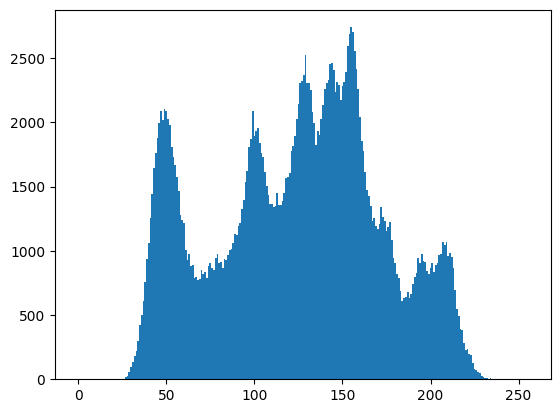

In [60]:
y = Hist(img)
x = [x for x in range(256)]
plt.bar(x, y, width=  1)
plt.show()